## Importing libraries

In [1]:
# Pandas for managing datasets
import pandas as pd

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Seaborn for plotting and styling
import seaborn as sns

## Importing dataset from excel file

In [5]:
# Import data from excel
TMAData = pd.read_excel(r'TMA.xlsx') # Replace r'...' with new file location

#Setting dataframe
df_TMA = pd.DataFrame(TMAData)

#Print TMA Dataset
display(df_TMA)

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,1986-07-10 00:00:00,F,Single,Citizen,Yes,2012-02-04 00:00:00,NaN,Manufacturing,46335,Meet,3.40,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,2014-12-05 00:00:00,NaN,Manufacturing,66825,Meet,4.60,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.40,4,14
3,4,Aayan Ferrell,1984-10-06 00:00:00,M,Married,Citizen,No,2016-05-01 00:00:00,NaN,Admin,93046,Meet,4.10,4,20
4,5,Ace Potter,1989-08-09 00:00:00,F,Divorced,Citizen,No,2011-11-07 00:00:00,2020-06-09 00:00:00,Manufacturing,50825,Meet,5.00,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,1981-11-10 00:00:00,F,Married,Non-Resident,No,2/16/2015,NaN,IT,89883,Meet,3.69,5,15
246,247,Zane Downes,10/24/87,M,Married,Non-Resident,No,4/20/2017,NaN,IT,90100,Meet,3.40,3,14
247,248,Zayd Farley,1970-09-07 00:00:00,M,Single,Non-Resident,No,2014-05-01 00:00:00,NaN,IT,138888,Exceed,4.30,5,4
248,249,Zoya Easton,1980-02-08 00:00:00,F,Single,Non-Resident,No,8/13/2012,2015-01-09 00:00:00,Manufacturing,50274,To Improve,2.50,3,13


## Calculating "Employees by Performance Score" for Chart A data table

In [6]:
#Calculating number of employees in "PIP"
PIP = (sum(df_TMA.PerformanceScore =="PIP"))
print(PIP)

#Calculating number of employees in "To Improve"
To_Improve = (sum(df_TMA.PerformanceScore =="To Improve"))
print(To_Improve)

#Calculating number of employees in "Meet"
Meet = (sum(df_TMA.PerformanceScore =="Meet"))
print(Meet)

#Calculating number of employees in "Exceed"
Exceed = (sum(df_TMA.PerformanceScore =="Exceed"))
print(Exceed)

2
17
201
30


## Calculating "Average Satisfaction" for Chart A data table

In [7]:
#Calculating average satisfaction in "PIP"
AS_PIP=(df_TMA.loc[df_TMA['PerformanceScore'] == 'PIP', 'Satisfaction'].sum() / PIP)
print(AS_PIP)

#Calculating average satisfaction in "To Improve"
AS_To_Improve=(df_TMA.loc[df_TMA['PerformanceScore'] == 'To Improve', 'Satisfaction'].sum() / To_Improve)
print(AS_To_Improve)

#Calculating average satisfaction in "Meet"
AS_Meet=(df_TMA.loc[df_TMA['PerformanceScore'] == 'Meet', 'Satisfaction'].sum() / Meet)
print(AS_Meet)

#Calculating average satisfaction in "Exceed"
AS_Exceed=(df_TMA.loc[df_TMA['PerformanceScore'] == 'Exceed', 'Satisfaction'].sum() / Exceed)
print(AS_Exceed)

1.5
3.6470588235294117
3.970149253731343
4.1


## Creating Chart A data table

In [8]:
# Creating Chart A data table
ChartA_data = {'Performance Score': ['PIP', 'To Improve', 'Meet', 'Exceed'],
        'Employees by Performance Score': [PIP, To_Improve, Meet, Exceed],
        'Average Satisfaction': [AS_PIP, AS_To_Improve, AS_Meet, AS_Exceed]}

# Creating Chart A dataframe
ChartA = pd.DataFrame(ChartA_data)

# Rounding off Average Satisfaction to 2 decimal places
ChartA['Average Satisfaction'] = ChartA['Average Satisfaction'].round(decimals = 2)

# Print Chart A data
display(ChartA)

,Performance Score,Employees by Performance Score,Average Satisfaction
0,PIP,2,1.50
1,To Improve,17,3.65
2,Meet,201,3.97
3,Exceed,30,4.10


## Creating Chart A, dual-axis chart

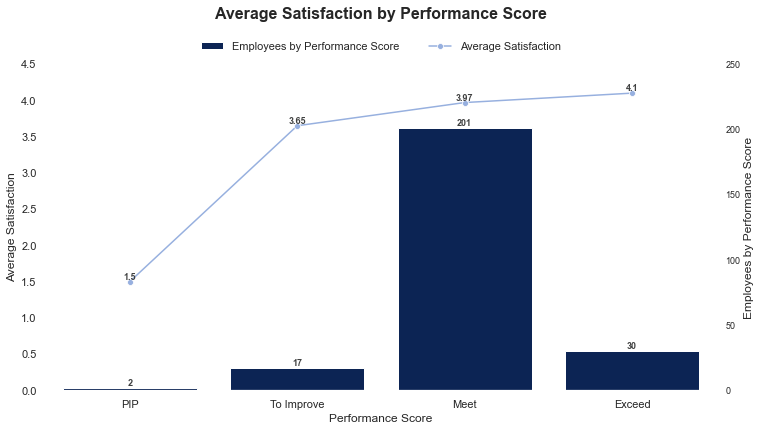

In [9]:
# Set default font family to 'Arial'
plt.rcParams.update({'font.family':'Arial'})

# Set theme for Chart A
sns.set_theme(style='dark',rc={'axes.facecolor':'White', 'figure.facecolor':'White'})
fig, ax1 = plt.subplots(figsize=(12,6))



# Plot dataset A as dual-axis chart
# Plot line chart as left y axis
LC=sns.lineplot(data = ChartA, y='Average Satisfaction',x='Performance Score', marker='o', ax=ax1, color='#97b0df',label='Average Satisfaction')
ax2 = ax1.twinx()

# Plot bar chart as right y axis
BC=sns.barplot(data = ChartA, x = 'Performance Score', y = 'Employees by Performance Score', ax=ax2, color='#002060', label='Employees by Performance Score')

# Show values on bar chart
for i in ax2.containers:
    ax2.bar_label(i,label_type='edge', fontsize=9, color='#404141', weight='bold')

# Show and format alignment of values on line chart
for x, y in zip(ChartA['Performance Score'], ChartA['Average Satisfaction']):
    ax1.annotate(y, xy=(x, y), textcoords='data',horizontalalignment='center', verticalalignment='bottom', color='#404141', fontsize=9, weight='bold',)
    
# Set, format, and move title
ax1.set_title("Average Satisfaction by Performance Score", fontsize=16 ,weight='bold', y=1.12)

# Add legend and move to top of plot area
ax1.legend(loc='upper center', bbox_to_anchor=(0.67, 1.10),frameon=False)
ax2.legend(loc='upper center', bbox_to_anchor=(0.38, 1.10),frameon=False)

# Format font size of all axes
plt.tick_params(axis='both', which='major', labelsize=9)

#Set axis limit for left y axis
ax1.set_ylim(0, 4.5)

#Set axis limit for right y axis
ax2.set_ylim(0, 250)

# Turn off grid and ticks on left y xaxis
ax1.grid(False)
ax1.tick_params(left = False)

# Turn off grid and ticks on the right y axis
ax2.grid(False)
ax2.tick_params(right = False)

# Show chart
plt.show(LC,BC)


## Creating 'Age' column from BirthYear for Chart B data table

In [10]:
#Import date from datetime
from datetime import date

# function
def calc_age(bd: pd.Series) -> pd.Series:
    today = pd.to_datetime(date.today())  # convert today to a pandas datetime
    return (today - bd) / pd.Timedelta(days=365.25)  # divide by days to get years


# call function and assign the values to a new column in the dataframe
df_TMA['Age'] = calc_age(df_TMA.BirthYear)

# Print ID, Staff, and Age columns
display(df_TMA[['ID','Staff','Age']])

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

## [Manufacturing] Segregating unit into different age generations

In [ ]:
# Count and print number of Millennials (Age 23-38) in unit "Manufacturing"
M_M = df_TMA[(df_TMA['Unit']=='Manufacturing') & (df_TMA['Age']>=23) & (df_TMA['Age']<=38)]['Age'].count()
print(M_M)

# Count and print number of Gen X (Age 39-54) in unit "Manufacturing"
M_G = df_TMA[(df_TMA['Unit']=='Manufacturing') & (df_TMA['Age']>=39) & (df_TMA['Age']<=54)]['Age'].count()
print(M_G)

# Count and print number of Gen X (Age 39-54) in unit "Manufacturing"
M_B = df_TMA[(df_TMA['Unit']=='Manufacturing') & (df_TMA['Age']>=55) & (df_TMA['Age']<=73)]['Age'].count()
print(M_B)

## [IT] Segregating unit into different age generations

In [ ]:
# Count and print number of Millennials (Age 23-38) in unit "IT"
IT_M = df_TMA[(df_TMA['Unit']=='IT') & (df_TMA['Age']>=23) & (df_TMA['Age']<=38)]['Age'].count()
print(IT_M)

# Count and print number of Gen X (Age 39-54) in unit "IT"
IT_G = df_TMA[(df_TMA['Unit']=='IT') & (df_TMA['Age']>=39) & (df_TMA['Age']<=54)]['Age'].count()
print(IT_G)

# Count and print number of Boomers(Age 39-54) in unit "IT"
IT_B = df_TMA[(df_TMA['Unit']=='Manufacturing') & (df_TMA['Age']>=55) & (df_TMA['Age']<=73)]['Age'].count()
print(IT_B)

## [Sales] Segregating unit into different age generations

In [ ]:
# Count and print number of Millennials (Age 23-38) in unit "Sales"
Sales_M = df_TMA[(df_TMA['Unit']=='Sales') & (df_TMA['Age']>=23) & (df_TMA['Age']<=38)]['Age'].count()
print(Sales_M)

# Count and print number of Gen X (Age 39-54) in unit "Sales"
Sales_G = df_TMA[(df_TMA['Unit']=='Sales') & (df_TMA['Age']>=39) & (df_TMA['Age']<=54)]['Age'].count()
print(Sales_G)

# Count and print number of Gen X (Age 39-54) in unit "Sales"
Sales_B = df_TMA[(df_TMA['Unit']=='Sales') & (df_TMA['Age']>=55) & (df_TMA['Age']<=73)]['Age'].count()
print(Sales_B)

## [Admin] Segregating unit into different age generations

In [ ]:
# Count and print number of Millennials (Age 23-38) in unit "Admin"
Admin_M = df_TMA[(df_TMA['Unit']=='Admin ') & (df_TMA['Age']>=23) & (df_TMA['Age']<=38)]['Age'].count()
print(Admin_M)

# Count and print number of Gen X (Age 39-54) in unit "Admin"
Admin_G = df_TMA[(df_TMA['Unit']=='Admin ') & (df_TMA['Age']>=39) & (df_TMA['Age']<=54)]['Age'].count()
print(Admin_G)

# Count and print number of Gen X (Age 39-54) in unit "Admin"
Admin_B = df_TMA[(df_TMA['Unit']=='Admin ') & (df_TMA['Age']>=55) & (df_TMA['Age']<=73)]['Age'].count()
print(Admin_B)

## [Engineering] Segregating unit into different age generations

In [ ]:
# Count and print number of Millennials (Age 23-38) in unit "Engineering"
E_M = df_TMA[(df_TMA['Unit']=='Engineering') & (df_TMA['Age']>=23) & (df_TMA['Age']<=38)]['Age'].count()
print(E_M)

# Count and print number of Gen X (Age 39-54) in unit "Engineering"
E_G = df_TMA[(df_TMA['Unit']=='Engineering') & (df_TMA['Age']>=39) & (df_TMA['Age']<=54)]['Age'].count()
print(E_G)

# Count and print number of Gen X (Age 39-54) in unit "Engineering"
E_B = df_TMA[(df_TMA['Unit']=='Engineering') & (df_TMA['Age']>=55) & (df_TMA['Age']<=73)]['Age'].count()
print(E_B)

## [C-Level] Segregating unit into different age generations

In [ ]:
# Count and print number of Millennials (Age 23-38) in unit "C-Level"
C_M = df_TMA[(df_TMA['Unit']=='C-Level') & (df_TMA['Age']>=23) & (df_TMA['Age']<=38)]['Age'].count()
print(C_M)

# Count and print number of Gen X (Age 39-54) in unit "C-Level"
C_G = df_TMA[(df_TMA['Unit']=='C-Level') & (df_TMA['Age']>=39) & (df_TMA['Age']<=54)]['Age'].count()
print(C_G)

# Count and print number of Gen X (Age 39-54) in unit "C-Level"
C_B = df_TMA[(df_TMA['Unit']=='C-Level') & (df_TMA['Age']>=55) & (df_TMA['Age']<=73)]['Age'].count()
print(C_B)

## Creating Chart B data table

In [ ]:
# Creating Chart B data table
ChartB_data = {'Unit': ['Manufacturing', 'IT', 'Sales', 'Admin', 'Engineering', 'C-Level'],
        'Millennials (23-38)': [M_M, IT_M, Sales_M, Admin_M, E_M, C_M],
        'Gen X (39-54)': [M_G, IT_G, Sales_G, Admin_G, E_G, C_G],
        'Boomers (55-73)': [M_B, IT_B, Sales_B, Admin_B, E_B, C_B]}

# Creating Chart B dataframe
ChartB_t = pd.DataFrame(ChartB_data)

# Print Chart B table
display(ChartB_t)

## Creating Chart B, horizontal stacked bar chart

In [ ]:
# Set default font family to 'Arial'
plt.rcParams.update({'font.family':'Arial'})

# Import Library
import matplotlib.pyplot as plt

# Increase size of plot in jupyter notebook
plt.rcParams["figure.figsize"] = (20,5)

# Set seaborn theme for Chart B
sns.set_theme(style='dark',rc={'axes.facecolor':'White', # Set axes color to white
                               'figure.facecolor':'White'}) #Set figure color to white

# Create and format (Color and width) stacked bar chart
ChartB=ChartB_t.set_index('Unit').plot(kind='barh', # Sets horizontal
                                       stacked=True, # Sets bar chart to stacked
                                       color=['#002060', '#2f5597','#8fabdd'], # Sets custom color for bars
                                       width=0.7, # Customize width of bar chart to 0.7
                                       edgecolor = "none") # Removes bar borders

# Set and format title
ChartB.set_title("Age distribution by Unit", # Set chart title
                 fontsize=16 , # Set font size to 16
                 weight='bold', # Set title to be bolded
                 y=1.12) # Set position of title to exceed plot area at y=1.12

# Format legend
ChartB.legend(loc='upper center', # Set location of chart to upper center
              bbox_to_anchor=(0.5, 1.1), # Set location to exceed plot area at 0.5, 1.1
              frameon=False, # Removes frame from legend
              ncol=3, # Set legend to one row
              fontsize=9) # Set font size to 9

# Plot x axis label
plt.xlabel("Number of Employees")

# Annotate and format data labels
if i != 0:
    for i in ChartB.containers:
        ChartB.bar_label(i, label_type='center', fontsize=9, color='White', weight='bold')

# Show chart
plt.show(ChartB)

## Import libraries

In [19]:
# Import statistics
import statistics

#Import datetime
from datetime import datetime

## Calculate "Total Service Years" using "JoinDate" and "LeftDate"

In [20]:
emp=[]

# Loop to compare till all data is checked
for i in range(0,len(df_TMA['JoinDate'])):  
    if pd.isnull(df_TMA['LeftDate'].iloc[i])==True:  # If the LeftDate value of data row i is empty then this condition is true
        x=pd.Timestamp('2022-05-1T12:00:00')  # Set the date as 1/5/2022 for those that have not left yet
        emp.append(round((x-df_TMA['JoinDate'].iloc[i]).days/365,1))   # Convert JoinDate days in service into years
    else:  # If staff have left the organisation, run the else condition
        emp.append(round((df_TMA['LeftDate'].iloc[i]-df_TMA['JoinDate'].iloc[i]).days/365,1)) # Convert LeftDate days in service into years
df_TMA['Total Service Years']=emp # Create new column to save the total service years

# Print columns 'ID','Staff', and 'Total Service Years'
print('Total Service Years: ')
df_TMA[['ID','Staff','Total Service Years']]

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

## Calculate and print minimum, maximum, and average service

In [ ]:
print("Minimum Service: ","{:.1f}".format(min(emp)),'years')
print("Maximum Service: ","{:.1f}".format(max(emp)),'years')
print("Average Service: ","{:.1f}".format(statistics.mean(emp)),'years')

## Interactive user input to verify employment status

In [ ]:
found=False  # Flag to check if record found 
while True:  # Run till loop is broken 
    choice=input("Enter full name of staff to verify employment or 'exit' to quit: ")
    for i in df_TMA['Staff']:  # Checking all values in Staff column of the dataframe
        if i.lower()==choice.lower(): # Check if name is found, lower() allows checking with capital insensitivity
            print(i,"'s record was found in the staff of the organization")
            found=True  # Found variable is set True
            
# If 'exit' entered is by user then exit the loop
    if choice.lower()=='exit':  
        print('Quitting...')
        break
        
# If input by user is not found, print record not found
    if found==False:
        print(choice,"'s record was NOT found in the staff of the organization")    

Enter full name of staff to verify employment or 'exit' to quit: Ashleigh Mccabe
Ashleigh Mccabe 's record was found in the staff of the organization
Enter full name of staff to verify employment or 'exit' to quit: ashleigh mccabe
Ashleigh Mccabe 's record was found in the staff of the organization
